In [20]:
import pandas as pd
import CCD_packages
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
GroupDF,motionInfo=CCD_packages.getCCDSubjectData()
goodsubj = CCD_packages.getSubjectList(GroupDF=GroupDF,motionThresh=1)



In [102]:
logData=pd.read_csv('/home/jmuraskin/Projects/CCD/CCD-scripts/CCD_logfile_performance.csv')
# logData.set_index('filename',inplace=True)
performance=pd.read_csv('/home/jmuraskin/Projects/CCD/CCD-scripts/analysis/CCD_performance.csv',names=['Subject_ID','FB','scanorder','R'])

feedback_fmri_subj=pd.read_csv('./Feedback_cope1_feedback_out.txt',header=None,names=['perf'])
nofeedback_fmri_subj=pd.read_csv('./Feedback_cope1_nofeedback_out.txt',header=None,names=['perf'])

nofeedback_nofb_fmri_subj=pd.read_csv('./noFeedback_cope1_nofeedback_out.txt',header=None,names=['perf'])
nofeedback_fb_fmri_subj=pd.read_csv('./noFeedback_cope1_feedback_out.txt',header=None,names=['perf'])

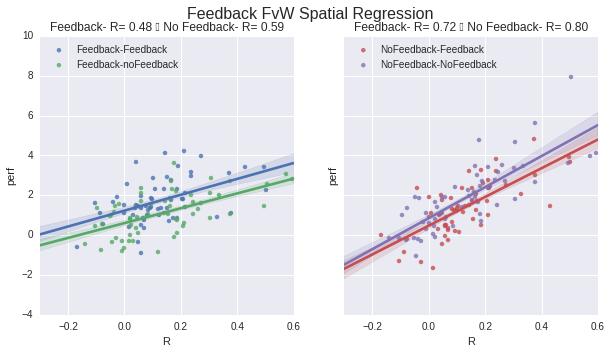

In [143]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True)
# plt.subplots(121)
sns.regplot(performance[np.all([performance['FB']=='FEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],feedback_fmri_subj['perf'],ci=68,label='Feedback-Feedback',ax=ax1)

sns.regplot(performance[np.all([performance['FB']=='NOFEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_fmri_subj['perf'],ci=68,label='Feedback-noFeedback',ax=ax1)
ax1.legend(loc=2)
ax1.set_title('Feedback- R= %0.2f \t No Feedback- R= %0.2f' % (pearsonr(performance[np.all([performance['FB']=='FEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],feedback_fmri_subj['perf'])[0],pearsonr(performance[np.all([performance['FB']=='NOFEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_fmri_subj['perf'])[0]) )

# plt.subplots(122)
sns.regplot(performance[np.all([performance['FB']=='FEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_fb_fmri_subj['perf'],ci=68,label='NoFeedback-Feedback',ax=ax2)

sns.regplot(performance[np.all([performance['FB']=='NOFEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_nofb_fmri_subj['perf'],ci=68,label='NoFeedback-NoFeedback',ax=ax2)

ax2.set_title('Feedback- R= %0.2f \t No Feedback- R= %0.2f' % (pearsonr(performance[np.all([performance['FB']=='FEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_fb_fmri_subj['perf'])[0],
                                                             pearsonr(performance[np.all([performance['FB']=='NOFEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_nofb_fmri_subj['perf'])[0]) )


ax2.legend(loc=2)

fig.suptitle('Feedback FvW Spatial Regression',fontsize=16)

In [125]:
print pearsonr(performance[np.all([performance['FB']=='FEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],feedback_fmri_subj['perf'])

print pearsonr(performance[np.all([performance['FB']=='NOFEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_fmri_subj['perf'])

(0.47693119098675546, 0.00011685983774759951)
(0.58771243984646437, 7.9355498859363764e-07)


In [33]:
print pearsonr(performance[np.all([performance['FB']=='FEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_fb_fmri_subj['perf'])

print pearsonr(performance[np.all([performance['FB']=='NOFEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_nofb_fmri_subj['perf'])

(0.71710823761347398, 1.1542373509094447e-10)
(0.8011822449715712, 1.5032914439701879e-14)


In [43]:
feedback_pos_fb_fmri_subj=pd.read_csv('./Feedback_pos_cope1_feedback_out.txt',header=None,names=['perf'])
feedback_neg_fb_fmri_subj=pd.read_csv('./Feedback_neg_cope1_feedback_out.txt',header=None,names=['perf'])

feedback_pos_nofb_fmri_subj=pd.read_csv('./Feedback_pos_cope1_nofeedback_out.txt',header=None,names=['perf'])
feedback_neg_nofb_fmri_subj=pd.read_csv('./Feedback_neg_cope1_nofeedback_out.txt',header=None,names=['perf'])


nofeedback_pos_fb_fmri_subj=pd.read_csv('./noFeedback_pos_cope1_feedback_out.txt',header=None,names=['perf'])
nofeedback_neg_fb_fmri_subj=pd.read_csv('./noFeedback_neg_cope1_feedback_out.txt',header=None,names=['perf'])

nofeedback_pos_nofb_fmri_subj=pd.read_csv('./noFeedback_pos_cope1_nofeedback_out.txt',header=None,names=['perf'])
nofeedback_neg_nofb_fmri_subj=pd.read_csv('./noFeedback_neg_cope1_nofeedback_out.txt',header=None,names=['perf'])
# nofeedback_fmri_subj=pd.read_csv('./Feedback_cope1_nofeedback_out.txt',header=None,names=['perf'])

# nofeedback_nofb_fmri_subj=pd.read_csv('./noFeedback_cope1_nofeedback_out.txt',header=None,names=['perf'])
# nofeedback_fb_fmri_subj=pd.read_csv('./noFeedback_cope1_feedback_out.txt',header=None,names=['perf'])

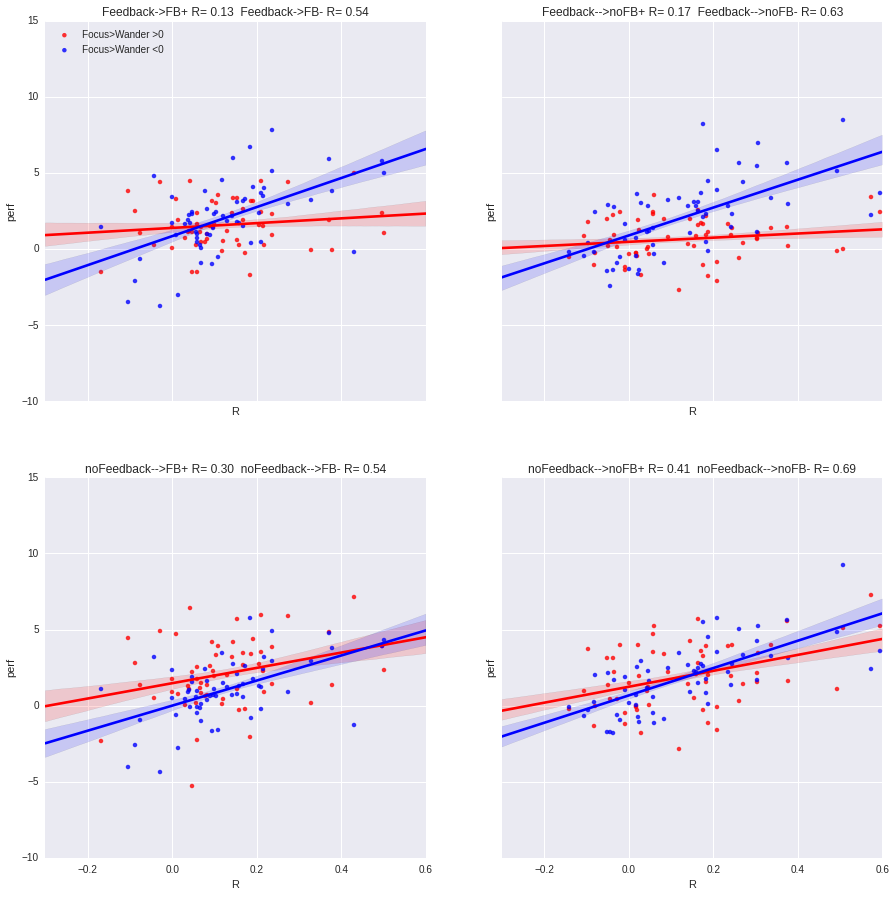

In [160]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True,sharey=True,figsize=(15,15))

sns.regplot(performance[np.all([performance['FB']=='FEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],feedback_pos_fb_fmri_subj['perf'],ci=68,ax=ax1,label='Focus>Wander >0',color='Red')

sns.regplot(performance[np.all([performance['FB']=='FEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],feedback_neg_fb_fmri_subj['perf'],ci=68,ax=ax1,label='Focus>Wander <0',color='Blue')

ax1.set_title('Feedback->FB+ R= %0.2f  Feedback->FB- R= %0.2f' % (pearsonr(performance[np.all([performance['FB']=='FEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],feedback_pos_fb_fmri_subj['perf'])[0],pearsonr(performance[np.all([performance['FB']=='FEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],feedback_neg_fb_fmri_subj['perf'])[0]) )
ax1.legend(loc=2)

# plt.figure()
sns.regplot(performance[np.all([performance['FB']=='NOFEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],feedback_pos_nofb_fmri_subj['perf'],ci=68,ax=ax2,label='Positive',color='Red')

sns.regplot(performance[np.all([performance['FB']=='NOFEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],feedback_neg_nofb_fmri_subj['perf'],ci=68,ax=ax2,label='Negative',color='Blue')

ax2.set_title('Feedback-->noFB+ R= %0.2f  Feedback-->noFB- R= %0.2f' % (pearsonr(performance[np.all([performance['FB']=='NOFEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],feedback_pos_nofb_fmri_subj['perf'])[0],pearsonr(performance[np.all([performance['FB']=='NOFEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],feedback_neg_nofb_fmri_subj['perf'])[0]) )


# Now run Feedback R by no feedback regression
sns.regplot(performance[np.all([performance['FB']=='FEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_pos_fb_fmri_subj['perf'],ci=68,ax=ax3,label='Positive',color='Red')

sns.regplot(performance[np.all([performance['FB']=='FEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_neg_fb_fmri_subj['perf'],ci=68,ax=ax3,label='Negative',color='Blue')
ax3.set_title('noFeedback-->FB+ R= %0.2f  noFeedback-->FB- R= %0.2f' % (pearsonr(performance[np.all([performance['FB']=='FEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_pos_fb_fmri_subj['perf'])[0],pearsonr(performance[np.all([performance['FB']=='FEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_neg_fb_fmri_subj['perf'])[0]) )


sns.regplot(performance[np.all([performance['FB']=='NOFEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_pos_nofb_fmri_subj['perf'],ci=68,ax=ax4,label='Positive',color='Red')

sns.regplot(performance[np.all([performance['FB']=='NOFEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_neg_nofb_fmri_subj['perf'],ci=68,ax=ax4,label='Negative',color='Blue')
ax4.set_title('noFeedback-->noFB+ R= %0.2f  noFeedback-->noFB- R= %0.2f' % (pearsonr(performance[np.all([performance['FB']=='NOFEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_pos_nofb_fmri_subj['perf'])[0],pearsonr(performance[np.all([performance['FB']=='NOFEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_neg_nofb_fmri_subj['perf'])[0]) )



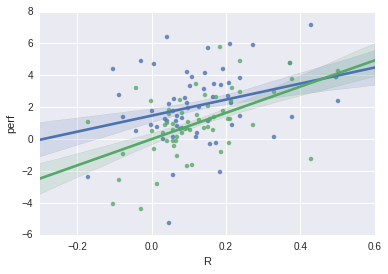

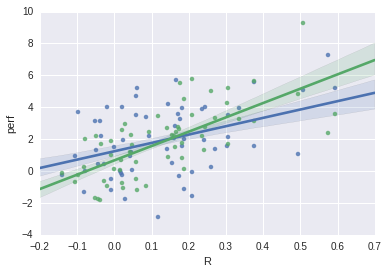

In [44]:
plt.figure()
sns.regplot(performance[np.all([performance['FB']=='FEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_pos_fb_fmri_subj['perf'],ci=68)

sns.regplot(performance[np.all([performance['FB']=='FEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_neg_fb_fmri_subj['perf'],ci=68)


plt.figure()
sns.regplot(performance[np.all([performance['FB']=='NOFEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_pos_nofb_fmri_subj['perf'],ci=68)

sns.regplot(performance[np.all([performance['FB']=='NOFEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],nofeedback_neg_nofb_fmri_subj['perf'],ci=68)


In [80]:
design=pd.read_csv('/home/jmuraskin/Projects/CCD/CCD-scripts/analysis/cope1_Factor_Analysis_age_gender/design.txt',header=None,names=['age','meanFD','FA1','FA2','gender'],delim_whitespace=True)

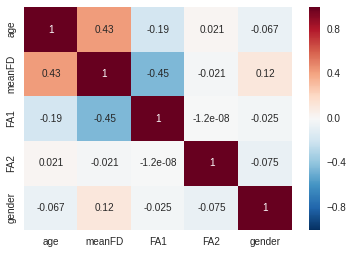

In [83]:
sns.heatmap(design.corr(),annot=True)

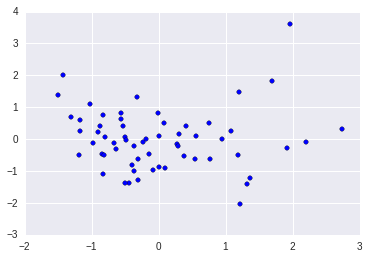

In [82]:
plt.scatter(design['FA1'],design['FA2'])

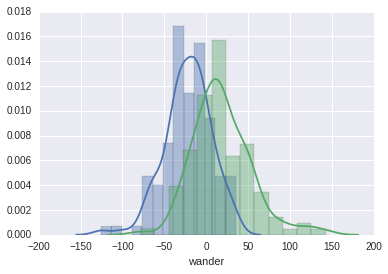

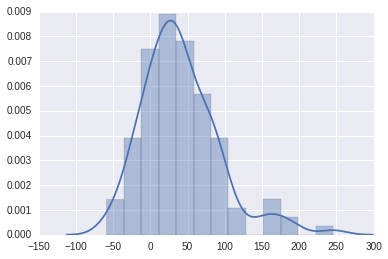

In [92]:
sns.distplot(logData['focus'])
sns.distplot(logData['wander'])
plt.figure()
sns.regplot(logData['wander']-logData['focus'])

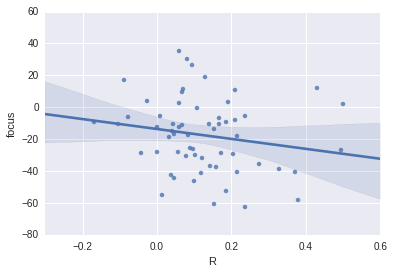

In [112]:
sns.regplot(performance[np.all([performance['FB']=='FEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'],logData[np.all([logData.filename.isin(goodsubj),logData.fb==1],axis=0)]['focus'])

In [115]:
FA=pd.read_csv('./FA_subjectloadings.csv',index_col=0)

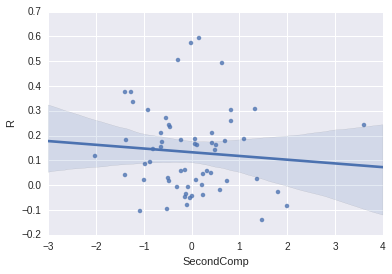

In [121]:
sns.regplot(FA.loc[goodsubj]['SecondComp'],performance[np.all([performance['FB']=='NOFEEDBACK',performance.Subject_ID.isin(goodsubj)],axis=0)]['R'])